# Crawling Berita

Crawling adalah proses di mana mesin pencari, seperti Google, mengakses dan mengumpulkan informasi dari berbagai halaman web di seluruh internet. Proses ini dilakukan oleh program perangkat lunak yang disebut "web crawler" atau "spider". Web crawler bekerja dengan menjelajahi (mengcrawl) halaman-halaman web secara sistematis, mengikuti tautan-tautan yang ada di halaman tersebut untuk menemukan halaman-halaman lain.

Crawling juga langkah awal yang penting dalam siklus pencarian mesin pencari yang memungkinkan mesin pencari untuk mengumpulkan dan menyimpan informasi dari seluruh web, sehingga dapat menyajikannya kepada pengguna saat mereka melakukan pencarian.

Kali ini saya menggunakan Library BeautifulSoup `from bs4 import BeautifulSoup`. Beautiful Soup adalah sebuah library Python yang digunakan untuk mengekstrak data dari file HTML dan XML. Ini menyediakan cara yang mudah dan praktis untuk melakukan pencarian, navigasi, dan manipulasi struktur pohon data dokumen HTML atau XML. Beautiful Soup membuat tugas-tugas seperti scraping web (mengambil data dari halaman web) menjadi lebih sederhana dan efisien.







In [4]:
import requests
from bs4 import BeautifulSoup
import csv

def scrape_detik():
    url = 'https://www.detik.com/search/searchnews?query=pemilu+2024&sortby=time&page=1'
    req = requests.get(url)
    sop = BeautifulSoup(req.text, 'html.parser')
    li = sop.find('div', class_='list media_rows list-berita')
    lin = li.find_all('article')

    x = lin[0]  # Ambil hanya satu artikel, yaitu yang pertama
    link = x.find('a')['href']
    date = x.find('a').find('span', class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
    headline = x.find('a').find('h2').text

    ge_ = requests.get(link).text
    sop_ = BeautifulSoup(ge_, 'html.parser')
    content = sop_.find('div', class_='detail__body-text itp_bodycontent')

    paragraphs = content.find_all('p')
    content_ = ''.join([p.get_text(strip=True) for p in paragraphs])

    return content_

# Panggil fungsi untuk scraping satu artikel
data = scrape_detik()
print(data)

Jaringan Relawan Gibran Nasional (JARGON) deklarasi mendukung pasangan calon nomor urut 2Prabowo Subianto dan Gibran Rakabuming Rakadi Pilpres 2024. Ketua JARGON Michael Kambong mengatakan deklarasi ini untuk kembali satu komando dengan Presiden Joko Widodo (Jokowi)."Jadi kita kembali ke pangkuan satu komando Pak Jokowi seperti yang sudah kami sampaikan tadi di pernyataan sikap. Dan juga dilanjutkan dengan deklarasi bahwa JARGON ini awal dibentuk adalah satu komando Jokowi makanya hashtagnya, medianya, di mana pun JARGON Indonesia Maju 2024," kata Michael kepada wartawan di Warung Buncit, Jakarta Selatan (Jaksel), Senin (27/11/2023).Michael menyebut sikap itu dilakukan melihat dinamika politik di mana Prabowo dan Gibran secara sah menjadi capres dan cawapres dengan nomor urut dua. Michael menyatakan pihaknya sepakat untuk kembali mendukung Prabowo dan Gibran maju di Pilpres 2024 menuju Indonesia Maju.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Sehingga ketika kita melihat dinamika pol

In [5]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Fungsi untuk menghapus tanda baca, tokenisasi, dan stemming per kata dalam setiap kalimat
def tokenisasi_text(teks):
    # Tokenisasi kalimat
    kalimat = sent_tokenize(teks)
    return kalimat

sentence = tokenisasi_text(data)
print(sentence)

['Jaringan Relawan Gibran Nasional (JARGON) deklarasi mendukung pasangan calon nomor urut 2Prabowo Subianto dan Gibran Rakabuming Rakadi Pilpres 2024.', 'Ketua JARGON Michael Kambong mengatakan deklarasi ini untuk kembali satu komando dengan Presiden Joko Widodo (Jokowi).', '"Jadi kita kembali ke pangkuan satu komando Pak Jokowi seperti yang sudah kami sampaikan tadi di pernyataan sikap.', 'Dan juga dilanjutkan dengan deklarasi bahwa JARGON ini awal dibentuk adalah satu komando Jokowi makanya hashtagnya, medianya, di mana pun JARGON Indonesia Maju 2024," kata Michael kepada wartawan di Warung Buncit, Jakarta Selatan (Jaksel), Senin (27/11/2023).Michael menyebut sikap itu dilakukan melihat dinamika politik di mana Prabowo dan Gibran secara sah menjadi capres dan cawapres dengan nomor urut dua.', 'Michael menyatakan pihaknya sepakat untuk kembali mendukung Prabowo dan Gibran maju di Pilpres 2024 menuju Indonesia Maju.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Sehingga ketika kita melih

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import math
from collections import Counter
import pandas as pd

# Menghitung jumlah kata dalam setiap kalimat
tf_kalimat = [Counter(words.split()) for words in sentence]

# Menghitung IDF (Inverse Document Frequency)
def calculate_tf_idf(tf_kalimat):
    num_documents = len(tf_kalimat)
    idf_values = {}

    # Mencari setiap kata dalam setiap kalimat untuk menghitung IDF
    for tf in tf_kalimat:
        for word, count in tf.items():
            if word in idf_values:
                idf_values[word] += 1
            else:
                idf_values[word] = 1

    tf_idf_kalimat = []

    for tf in tf_kalimat:
        tf_idf = {}
        for word, count in tf.items():
            tf_idf[word] = (count / len(tf)) * math.log(num_documents / idf_values[word])
        tf_idf_kalimat.append(tf_idf)

    return tf_idf_kalimat

# Hasil TF-IDF
hasil_tf_idf = calculate_tf_idf(tf_kalimat)

# Mengonversi list of dicts ke dalam DataFrame
df_tf_idf = pd.DataFrame(hasil_tf_idf)
df_tf_idf.fillna(0, inplace=True)  # Mengganti nilai NaN dengan 0

# Tampilkan hasil dalam DataFrame
df_tf_idf


,Jaringan,Relawan,Gibran,Nasional,(JARGON),deklarasi,mendukung,pasangan,calon,nomor,...,telah,RI,5,tahun,kepemimpinan,pemerintah,oleh,Wakil,berikutnya,Raka.
0,0.142497,0.142497,0.053945,0.142497,0.142497,0.065481,0.103989,0.142497,0.103989,0.065481,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.073666,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.009337,0.000000,0.000000,0.022666,0.000000,0.000000,0.000000,0.022666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.023119,0.000000,0.000000,0.000000,0.044567,0.000000,0.000000,0.056126,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.019040,0.000000,0.000000,0.000000,0.000000,0.000000,0.036702,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.038021,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.026973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
import math
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Diasumsikan hasil_tf_idf adalah list yang berisi nilai TF-IDF

# Mengonversi list dari kamus ke DataFrame pandas
df_tf_idf = pd.DataFrame(hasil_tf_idf)
df_tf_idf = df_tf_idf.fillna(0)  # Mengganti nilai NaN dengan 0

# Mengonversi DataFrame ke array NumPy untuk perhitungan kesamaan kosinus
tfidf_matrix = df_tf_idf.to_numpy()

# Menghitung kesamaan kosinus
similarity_matrix = cosine_similarity(tfidf_matrix)
df_tf_idf = pd.DataFrame(similarity_matrix)

kalimat = ["Kalimat " + str(i) for i in range(1, len(similarity_matrix) + 1)]
df_tf_idf = df_tf_idf.set_axis(kalimat, axis=0)
df_tf_idf = df_tf_idf.set_axis(kalimat, axis=1)

df_tf_idf

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13
Kalimat 1,1.000000,0.022767,0.000000,0.037553,0.103963,0.036908,0.040622,0.000000,0.014158,0.048316,0.030595,0.025593,0.025310
Kalimat 2,0.022767,1.000000,0.092922,0.102599,0.043470,0.085396,0.003966,0.004490,0.017365,0.037814,0.009869,0.026408,0.113249
Kalimat 3,0.000000,0.092922,1.000000,0.070048,0.045367,0.055991,0.013302,0.032526,0.103111,0.000000,0.006130,0.008615,0.025642
Kalimat 4,0.037553,0.102599,0.070048,1.000000,0.129854,0.089161,0.049570,0.025938,0.070322,0.051830,0.032826,0.038987,0.035624
Kalimat 5,0.103963,0.043470,0.045367,0.129854,1.000000,0.145876,0.044253,0.000000,0.027799,0.022846,0.009383,0.022559,0.007030
Kalimat 6,0.036908,0.085396,0.055991,0.089161,0.145876,1.000000,0.008496,0.175311,0.061048,0.137522,0.104861,0.089208,0.021135
Kalimat 7,0.040622,0.003966,0.013302,0.049570,0.044253,0.008496,1.000000,0.004005,0.160862,0.022188,0.012133,0.008874,0.000000
Kalimat 8,0.000000,0.004490,0.032526,0.025938,0.000000,0.175311,0.004005,1.000000,0.050425,0.005155,0.055438,0.000000,0.028822
Kalimat 9,0.014158,0.017365,0.103111,0.070322,0.027799,0.061048,0.160862,0.050425,1.000000,0.006210,0.010129,0.008142,0.027520
Kalimat 10,0.048316,0.037814,0.000000,0.051830,0.022846,0.137522,0.022188,0.005155,0.006210,1.000000,0.335623,0.143673,0.040280


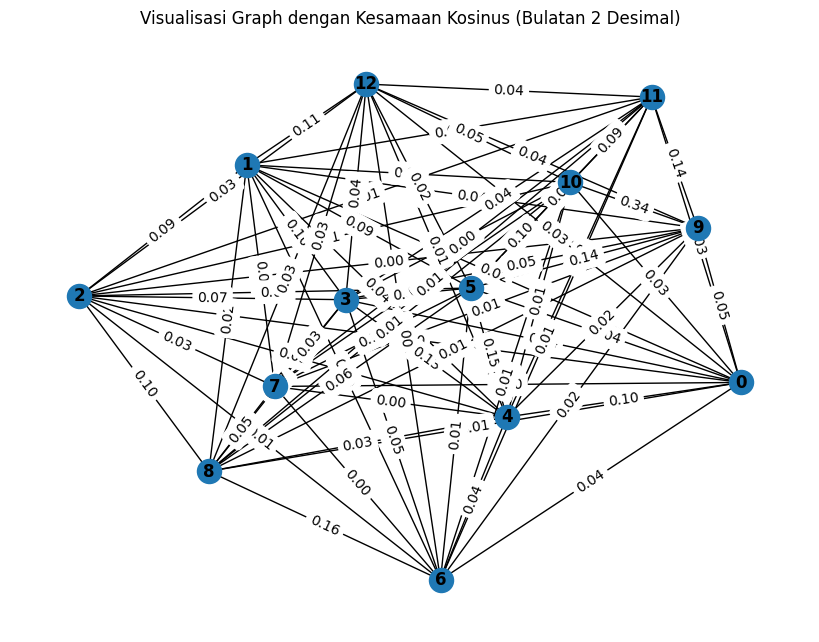

In [8]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge
plt.title("Visualisasi Graph dengan Kesamaan Kosinus (Bulatan 2 Desimal)")
plt.show()


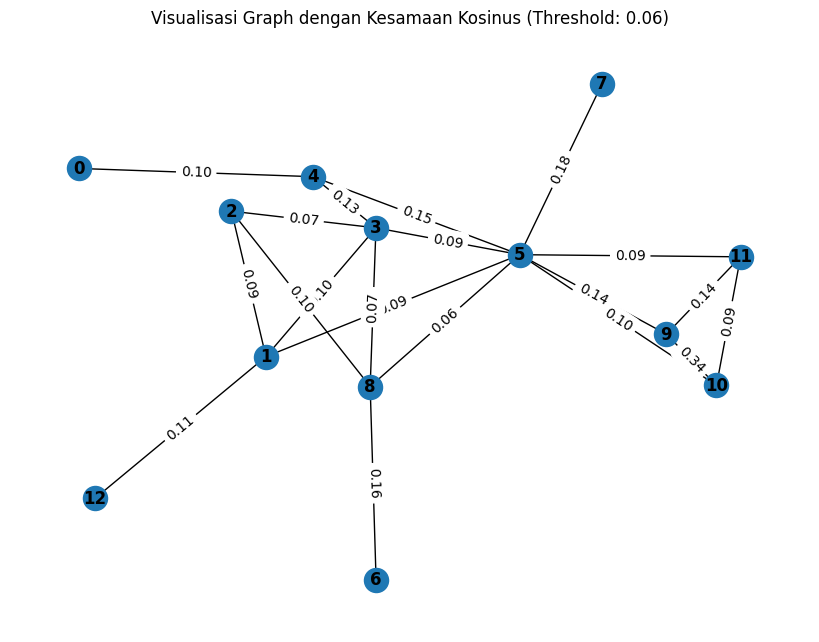

In [9]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
G.add_nodes_from(range(len(similarity_matrix)))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    # isolated_nodes_labels = {node: f'Node {node} (Not connected)' for node in isolated_nodes}
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


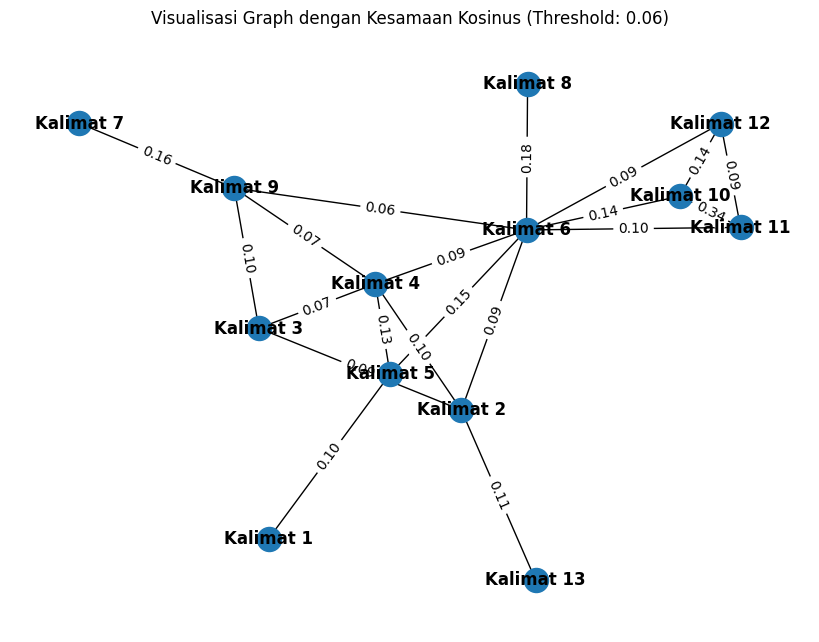

In [10]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
num_nodes = len(similarity_matrix)
G.add_nodes_from(range(num_nodes))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik

# Buat mapping untuk label node
node_labels = {i: f"Kalimat {i + 1}" for i in range(num_nodes)}

nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


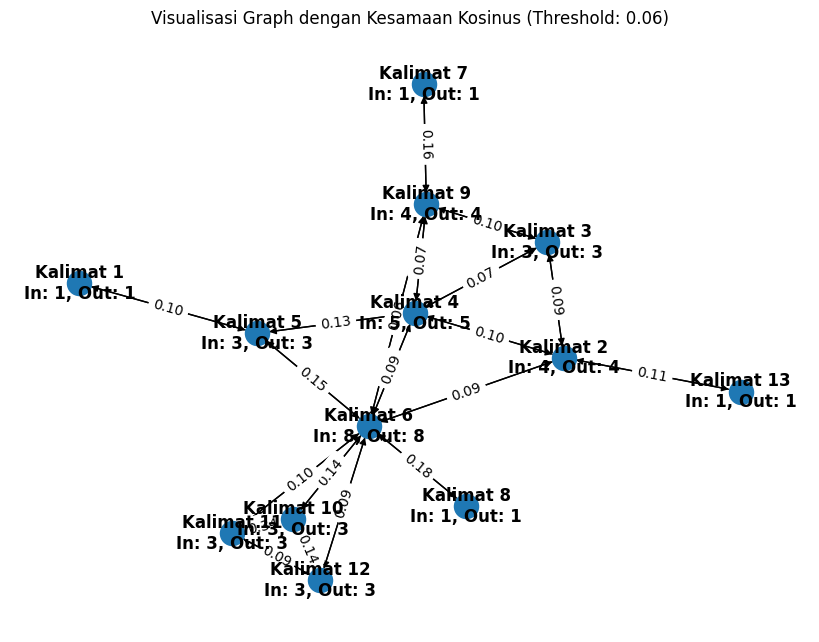

In [11]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.DiGraph()  # Menggunakan Directed Graph agar dapat mengakses in_degree dan out_degree
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
num_nodes = len(similarity_matrix)
G.add_nodes_from(range(num_nodes))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Hitung indegree dan outdegree untuk setiap node
indegree = dict(G.in_degree())
outdegree = dict(G.out_degree())

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik

# Buat mapping untuk label node
node_labels = {i: f"Kalimat {i + 1}\nIn: {indegree[i]}, Out: {outdegree[i]}" for i in range(num_nodes)}

nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


In [12]:
# Menghitung closeness centrality dari graph
closeness = nx.closeness_centrality(G)

# Menampilkan closeness centrality
print("Closeness Centrality:")
for node, closeness_value in closeness.items():
    print(f"Node {node}: {closeness_value}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on closeness centrality:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on closeness centrality:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")

Closeness Centrality:
Node 0: 0.35294117647058826
Node 1: 0.5454545454545454
Node 2: 0.46153846153846156
Node 3: 0.631578947368421
Node 4: 0.5217391304347826
Node 5: 0.75
Node 6: 0.36363636363636365
Node 7: 0.4444444444444444
Node 8: 0.5454545454545454
Node 9: 0.48
Node 10: 0.48
Node 11: 0.48
Node 12: 0.36363636363636365
Top 4 sentences based on closeness centrality:
Maka JARGON sudah menyatakan bahwa kita harus kembali pada dukungan kepada Mas Gibran yang melanjutkan Prabowo dan Mas Gibran sebagai calon presiden wakil presiden 2024 menuju Indonesia Maju dan ini kewajiban kita generasi milenial dan generasi Gen Z untuk mengawal hal itu," pungkasnya.Michael mengatakan pihaknya butuh waktu yang lama berkonsolidasi dengan dewan pimpinan pusat, wilayah, dan daerah untuk memutuskan bahwa JARGON beralih dukungan kepada Prabowo dan Gibran.
Dan juga dilanjutkan dengan deklarasi bahwa JARGON ini awal dibentuk adalah satu komando Jokowi makanya hashtagnya, medianya, di mana pun JARGON Indonesia 

In [13]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Menampilkan Closeness Centrality
print("PageRank:")
for node, rank in pagerank.items():
    print(f"Kalimat {node + 1}: {rank}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node + 1])

print("=============================")
print("Top 4 kalimat based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(f"Kalimat {node + 1} dengan PageRank {rank:.4f}")

#sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

PageRank:
Kalimat 1: 0.030603045997069735
Kalimat 2: 0.09062414838277957
Kalimat 3: 0.06185473537364179
Kalimat 4: 0.09849890108195329
Kalimat 5: 0.08522891329134381
Kalimat 6: 0.16953390459308373
Kalimat 7: 0.043217141723900385
Kalimat 8: 0.04035895237800738
Kalimat 9: 0.09084139713262378
Kalimat 10: 0.10563719335477252
Kalimat 11: 0.09098013091505204
Kalimat 12: 0.059356183524401786
Kalimat 13: 0.03326535225136993
Top 4 sentences based on PageRank:
Dia mengaku sudah berpamitan juga dengan capres nomor urut 3 yakni Ganjar Pranowo mengenai beralihnya dukungan.
Membangun kesadaran relawan millenial dan Gen Z bersama bisi dan misi capres Prabowo Subianto dan cawapres Gibran Rakabuming Raka dalam pemilu yang lebih berkualitas dan berintegritas dengan sasaran utama JARGON para generasi millenial dan Gen Z Indonesia.3.
Michael menyatakan pihaknya sepakat untuk kembali mendukung Prabowo dan Gibran maju di Pilpres 2024 menuju Indonesia Maju.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Sehingg

In [14]:
import networkx as nx

# Buat graf
G = nx.Graph()
G.add_edges_from(edge_labels)

# Inisialisasi PageRank
pagerank = {node: 1 / len(G.nodes) for node in G.nodes}

# Iterasi untuk menghitung PageRank
num_iterations = 10

for iteration in range(num_iterations):
    print(f"Iterasi {iteration + 1}:")
    new_pagerank = {}
    damping_factor = 0.85

    for node in G.nodes:
        rank_sum = 0
        for neighbor in G.neighbors(node):
            neighbor_outdegree = len(list(G.neighbors(neighbor)))
            rank_sum += pagerank[neighbor] / neighbor_outdegree

        # Hitung PageRank baru menggunakan rumus
        new_pagerank[node] = (1 - damping_factor) / len(G.nodes) + damping_factor * rank_sum

        # Cetak langkah-langkah perhitungan PageRank untuk setiap node
        print(f"  - Kalimat {node + 1}: ({(1 - damping_factor)}/{len(G.nodes)}) + ({damping_factor} * {rank_sum}) = {new_pagerank[node]}")

    # Perbarui nilai PageRank
    pagerank = new_pagerank
    print("\n")

# Menampilkan hasil PageRank akhir
print("Hasil Akhir PageRank:")
for node, rank in pagerank.items():
    print(f"Kalimat {node + 1}: {rank}")


Iterasi 1:
  - Kalimat 1: (0.15000000000000002/13) + (0.85 * 0.025641025641025644) = 0.03333333333333334
  - Kalimat 5: (0.15000000000000002/13) + (0.85 * 0.10192307692307692) = 0.09817307692307692
  - Kalimat 2: (0.15000000000000002/13) + (0.85 * 0.12756410256410258) = 0.11996794871794873
  - Kalimat 3: (0.15000000000000002/13) + (0.85 * 0.05384615384615385) = 0.05730769230769231
  - Kalimat 4: (0.15000000000000002/13) + (0.85 * 0.09935897435897438) = 0.09599358974358976
  - Kalimat 6: (0.15000000000000002/13) + (0.85 * 0.2333333333333333) = 0.20987179487179486
  - Kalimat 13: (0.15000000000000002/13) + (0.85 * 0.019230769230769232) = 0.02788461538461539
  - Kalimat 9: (0.15000000000000002/13) + (0.85 * 0.12756410256410258) = 0.11996794871794873
  - Kalimat 8: (0.15000000000000002/13) + (0.85 * 0.009615384615384616) = 0.019711538461538464
  - Kalimat 10: (0.15000000000000002/13) + (0.85 * 0.0608974358974359) = 0.06330128205128206
  - Kalimat 11: (0.15000000000000002/13) + (0.85 * 0.06

In [15]:
import networkx as nx

def calculate_pagerank(graph, damping_factor=0.85, max_iterations=100, tolerance=1e-6):
    # Inisialisasi PageRank
    pagerank = {node: 1 / len(graph.nodes) for node in graph.nodes}

    for iteration in range(max_iterations):
        new_pagerank = {}

        # Iterasi untuk setiap node
        for node in graph.nodes:
            rank_sum = 0
            for neighbor in graph.neighbors(node):
                neighbor_outdegree = len(list(graph.neighbors(neighbor)))
                rank_sum += pagerank[neighbor] / neighbor_outdegree

            # Hitung PageRank baru menggunakan rumus
            new_pagerank[node] = (1 - damping_factor) / len(graph.nodes) + damping_factor * rank_sum

        # Periksa konvergensi
        if all(abs(new_pagerank[node] - pagerank[node]) < tolerance for node in graph.nodes):
            break

        # Perbarui nilai PageRank
        pagerank = new_pagerank

    return pagerank

# Contoh penggunaan
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 2)])

result_pagerank = calculate_pagerank(G)
print("Hasil Akhir PageRank:")
for node, rank in result_pagerank.items():
    print(f"Kalimat {node}: {rank}")

Hasil Akhir PageRank:
Kalimat 1: 0.2047877610471576
Kalimat 2: 0.29521223895284243
Kalimat 3: 0.29521223895284243
Kalimat 4: 0.2047877610471576


In [16]:
# Hitung Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Hitung Eigenvalue Centrality
eigenvalue = nx.eigenvector_centrality_numpy(G)

# Menampilkan Eigenvector Centrality
print("Eigenvector Centrality:")
for node, eigenvector_value in eigenvector.items():
    print(f"Node {node}: {eigenvector_value:.4f}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")


print("=============================")

# Menampilkan Eigenvalue Centrality
print("Eigenvalue Centrality:")
for node, eigenvalue_value in eigenvalue.items():
    print(f"Node {node}: {eigenvalue_value:.4f}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(eigenvalue.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node])

print("=============================")
print("Top 4 node based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(f"Node {node} dengan PageRank {rank:.4f}")



Eigenvector Centrality:
Node 1: 0.4352
Node 2: 0.5573
Node 3: 0.5573
Node 4: 0.4352
Top 4 sentences based on PageRank:
"Jadi kita kembali ke pangkuan satu komando Pak Jokowi seperti yang sudah kami sampaikan tadi di pernyataan sikap.
Dan juga dilanjutkan dengan deklarasi bahwa JARGON ini awal dibentuk adalah satu komando Jokowi makanya hashtagnya, medianya, di mana pun JARGON Indonesia Maju 2024," kata Michael kepada wartawan di Warung Buncit, Jakarta Selatan (Jaksel), Senin (27/11/2023).Michael menyebut sikap itu dilakukan melihat dinamika politik di mana Prabowo dan Gibran secara sah menjadi capres dan cawapres dengan nomor urut dua.
Ketua JARGON Michael Kambong mengatakan deklarasi ini untuk kembali satu komando dengan Presiden Joko Widodo (Jokowi).
Michael menyatakan pihaknya sepakat untuk kembali mendukung Prabowo dan Gibran maju di Pilpres 2024 menuju Indonesia Maju.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Sehingga ketika kita melihat dinamika politik hingga akhir beberapa ha